In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from Functions import segmentation as seg
from Functions import visualization as vis
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
columns_names = ["Dice Score", "Seeded", "Preprocessing"]
dice_score = [0.901, 0.945, 0.983, 0.984, 0.980, 0.979, 0.911, 0.984, 0.889, 0.962]
segmentation_method =["s", "u", "s", "u", "s", "u", "s", "u", "s", "u"]
preprocessing = ['unprocessed', 'unprocessed', 'clipped', 'clipped', 'extreme clipped', 'extreme clipped', 'median filtered', 'median filtered', 'gauss filtered', 'gauss filtered']

df = pd.DataFrame(list(zip(dice_score, segmentation_method, preprocessing)), columns = columns_names)

print(df)

   Dice Score Seeded    Preprocessing
0       0.901      s      unprocessed
1       0.945      u      unprocessed
2       0.983      s          clipped
3       0.984      u          clipped
4       0.980      s  extreme clipped
5       0.979      u  extreme clipped
6       0.911      s  median filtered
7       0.984      u  median filtered
8       0.889      s   gauss filtered
9       0.962      u   gauss filtered


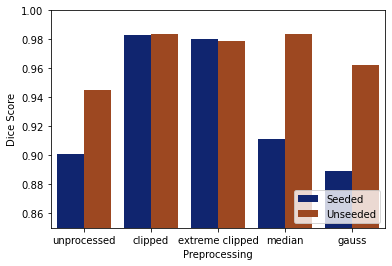

In [6]:
vis.barplot_preprocessing()

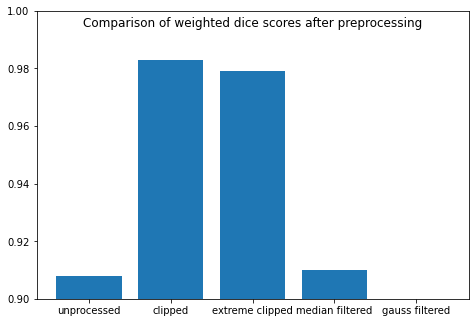

In [40]:
fig = plt.figure()
fig.suptitle("Comparison of weighted dice scores after preprocessing", fontsize = 12)
langs = ['unprocessed', 'clipped', 'extreme clipped', 'median filtered', 'gauss filtered']

ax = fig.add_axes([0,0,1,1])
weighted_ds = [0.908,0.983,0.979,0.910,0.889]
ax.bar(langs,weighted_ds)
plt.ylim(0.9, 1)


plt.show()

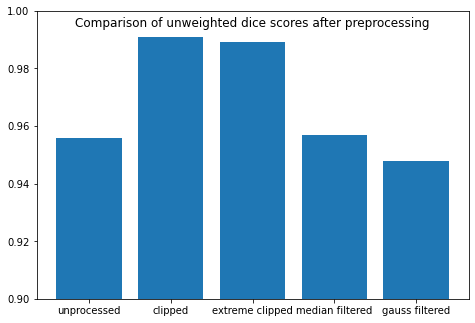

In [41]:
fig = plt.figure()
fig.suptitle("Comparison of unweighted dice scores after preprocessing", fontsize = 12)
langs = ['unprocessed', 'clipped', 'extreme clipped', 'median filtered', 'gauss filtered']

ax = fig.add_axes([0,0,1,1])
weighted_ds = [0.908,0.983,0.979,0.910,0.889]
unweighted_ds = [0.956, 0.991, 0.989, 0.957, 0.948]
ax.bar(langs,unweighted_ds)
plt.ylim(0.9, 1)


plt.show()


#plt.savefig("../Result_Pictures/Seeded_Region_Growing/bar_preprocessing_srg_unweighted")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

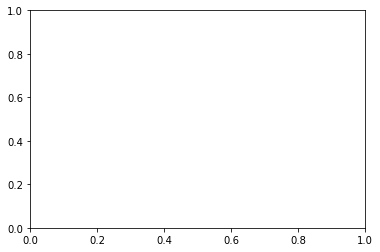

In [21]:
df = pd.DataFrame(zip(x * 3, ["y"] * 3 + ["z"] * 3 + ["k"] * 3, y + z + k), columns=["time", "kind", "data"])
plt.figure(figsize=(10, 6))
sns.barplot(x="time", hue="kind", y="data", data=df)
plt.show()

In [ ]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ds_weighted= [0.908,0.983,0.979,0.910,0.889]
rects1 = ax.bar(ind - width, ds_weighted, width, color='r')
ds_unweighted = [0.956, 0.991, 0.989, 0.957, 0.948]
rects2 = ax.bar(ind+width, ds_unweighted, width, color='g')

ax.set_ylabel('Dice Score')
ax.set_xticks(ind+width)
ax.set_xticklabels(('unprocessed', 'clipped', 'extreme clipped', 'median filtered', 'gauss filtered'))
ax.legend( (rects1[0], rects2[0]), ('weighted', 'unweighted') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()